Scrape data off social media to see sentiment on Ontario provincial Election

In [161]:
#import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from textblob import Word,TextBlob
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muhammadadeelbadar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some 

In [162]:
#connect to twitter api
consumer_key = 'zsJBZru1LYV7WNYspbNBKO4Jj'
consumer_secret = 'G6ogLZeB7wsM5OYjkQwqxNA50ktgKMXCy0gtyLvkjKpaNZN4oK'
access_token = '1468785157427666948-QtLqlg5NmL5bBl8Rc09Id1AVPnjZb4'
access_token_secret = 'azC7NHrLn81gQLiThBAH2sgUEY4Yblbi0ccgMJ2xReesj'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret
)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [163]:
#get tweets
hashtag='#OntarioVotes'
query = tweepy.Cursor(api.search_tweets, q=hashtag,geocode='43.657076,-79.384203,100km').items(1000)
tweets=[{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

In [164]:
#create dataframe
tweet_df=pd.DataFrame(tweets)

In [165]:
#create keywords to detect which party the tweet is about
ndp=['NDP','ndp','andrea','Andrea','Horwath','horwath']
liberal=['Liberal','liberal','Steven','steven','Duca','duca']
conservative=['conservative','Conservative','Doug','doug','Ford','ford']
tweet_df['ndp_column']=0
tweet_df['liberal_column']=0
tweet_df['conservative_column']=0

In [166]:
#create new column to detect who the tweet is about 
for i in range(0, len(tweet_df)):
    for f in range(0, len(ndp)):

        if ndp[f] in tweet_df['Tweet'][i]:
            tweet_df.at[i, 'ndp_column'] = 1
        if liberal[f] in tweet_df['Tweet'][i]:
            tweet_df.at[i, 'liberal_column'] = 1
        if conservative[f] in tweet_df['Tweet'][i]:
            tweet_df.at[i, 'conservative_column'] = 1


In [167]:
#preprocess tweets for easier sentiment analysis
tweet_df['ProcessedTweet'] = tweet_df['Tweet'].str.replace(r'#OntarioVotes', '')
tweet_df['ProcessedTweet'] = tweet_df['Tweet'].str.replace(r'#@', '')
for i in range (0, len(tweet_df)):
    for i in range (len(stopwords)):
        tweet_df['ProcessedTweet'] = tweet_df['Tweet'].str.replace((stopwords[i]), '')

    

In [168]:
#find wether sentiment is positive or negative based on huggingface transformeners model distilbert
x=[]
for i in range(len(tweet_df)):
    x.append(((classifier(tweet_df['ProcessedTweet'][i]))[0])['label'])
tweet_df['score']=x

In [169]:
#encode string in score column to integer
for i in range(len(tweet_df)):
    if tweet_df['score'][i]=='NEGATIVE':
        tweet_df['score'][i]=0
    elif tweet_df['score'][i]=='POSITIVE':
        tweet_df['score'][i]=1

/tmp/ipykernel_5534/441744322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['score'][i]=0
/tmp/ipykernel_5534/441744322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['score'][i]=1


In [170]:
tweet_df.head(10)

,Tweet,Timestamp,ndp_column,liberal_column,conservative_column,ProcessedTweet,score
0,Doug Ford put highways before kids. He likes t...,2022-06-11 21:00:01+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0
1,Doug Ford put highways before kids. He likes t...,2022-06-11 03:00:00+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0
2,Doug Ford put highways before kids. He likes t...,2022-06-11 01:15:00+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0
3,Doug Ford put highways before kids. He likes t...,2022-06-10 21:00:01+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0
4,Doug Ford said that he won't be happy until ON...,2022-06-10 14:52:24+00:00,0,0,1,Doug Ford said that he won't be happy until ON...,0
5,#UnitedDougRolls \n#June2022 This Munce Pin Up...,2022-06-09 19:54:39+00:00,0,0,1,#UnitedDougRolls \n#June2022 This Munce Pin Up...,0
6,Story by @TorontoStar QP buro chief @robertben...,2022-06-09 16:40:41+00:00,0,0,0,Story by @TorontoStar QP buro chief @robertben...,0
7,Please enjoy my #OntarioVotes cartoon in today...,2022-06-09 12:01:48+00:00,0,0,0,Please enjoy my #OntarioVotes cartoon in today...,1
8,The Greens had the Tories running scared in co...,2022-06-09 03:06:10+00:00,0,0,0,The Greens had the Tories running scared in co...,0
9,SIMPLE June 8: In Canada only the winning cand...,2022-06-08 20:14:02+00:00,0,0,0,SIMPLE June 8: In Canada only the winning cand...,0


In [171]:
#find polarity and subjectivity of tweets using textblob
tweet_df['polarity'] = tweet_df['ProcessedTweet'].apply(lambda x: TextBlob(x).sentiment[0])
tweet_df['subjectivity'] = tweet_df['ProcessedTweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [172]:
#Group by party and find average polarity and subjectivity
x=(tweet_df[tweet_df['ndp_column']==1][['ndp_column','polarity','subjectivity','score']].groupby('ndp_column').agg([np.mean, np.max, np.min, np.median]))
y=(tweet_df[tweet_df['liberal_column']==1][['liberal_column','polarity','subjectivity','score']].groupby('liberal_column').agg([np.mean, np.max, np.min, np.median]))
z=(tweet_df[tweet_df['conservative_column']==1][['conservative_column','polarity','subjectivity','score']].groupby('conservative_column').agg([np.mean, np.max, np.min, np.median]))



In [173]:
display(x,y,z)

polarity                  subjectivity                      score  \
                mean amax amin median         mean amax amin median      mean   
ndp_column                                                                      
1           0.164463  1.0 -0.4    0.0     0.415774  1.0  0.0    0.4  0.114286   

                             
           amax amin median  
ndp_column                   
1             1    0    0.0

polarity                       subjectivity            \
                    mean amax      amin median         mean amax amin   
liberal_column                                                          
1               0.106487  1.0 -0.541667    0.0     0.439827  1.0  0.0   

                             score                   
                  median      mean amax amin median  
liberal_column                                       
1               0.472222  0.166667    1    0    0.0

polarity                  subjectivity                   \
                         mean amax amin median         mean amax amin median   
conservative_column                                                            
1                    0.069531  1.0 -1.0    0.0     0.288461  1.0  0.0   0.11   

                        score                   
                         mean amax amin median  
conservative_column                             
1                    0.217949    1    0    0.0

In [174]:
#create rolling average for polarity
ndp = tweet_df[tweet_df['ndp_column']==1][['Timestamp', 'polarity']]
ndp = ndp.sort_values(by='Timestamp', ascending=True)
ndp['MA Polarity'] = ndp.polarity.rolling(10, min_periods=3).mean()

liberal = tweet_df[tweet_df['liberal_column']==1][['Timestamp', 'polarity']]
liberal = liberal.sort_values(by='Timestamp', ascending=True)
liberal['MA Polarity'] = liberal.polarity.rolling(10, min_periods=3).mean()

conservative = tweet_df[tweet_df['conservative_column']==1][['Timestamp', 'polarity']]
conservative = conservative.sort_values(by='Timestamp', ascending=True)
conservative['MA Polarity'] = conservative.polarity.rolling(10, min_periods=3).mean()


<AxesSubplot:xlabel='Timestamp', ylabel='MA Polarity'>

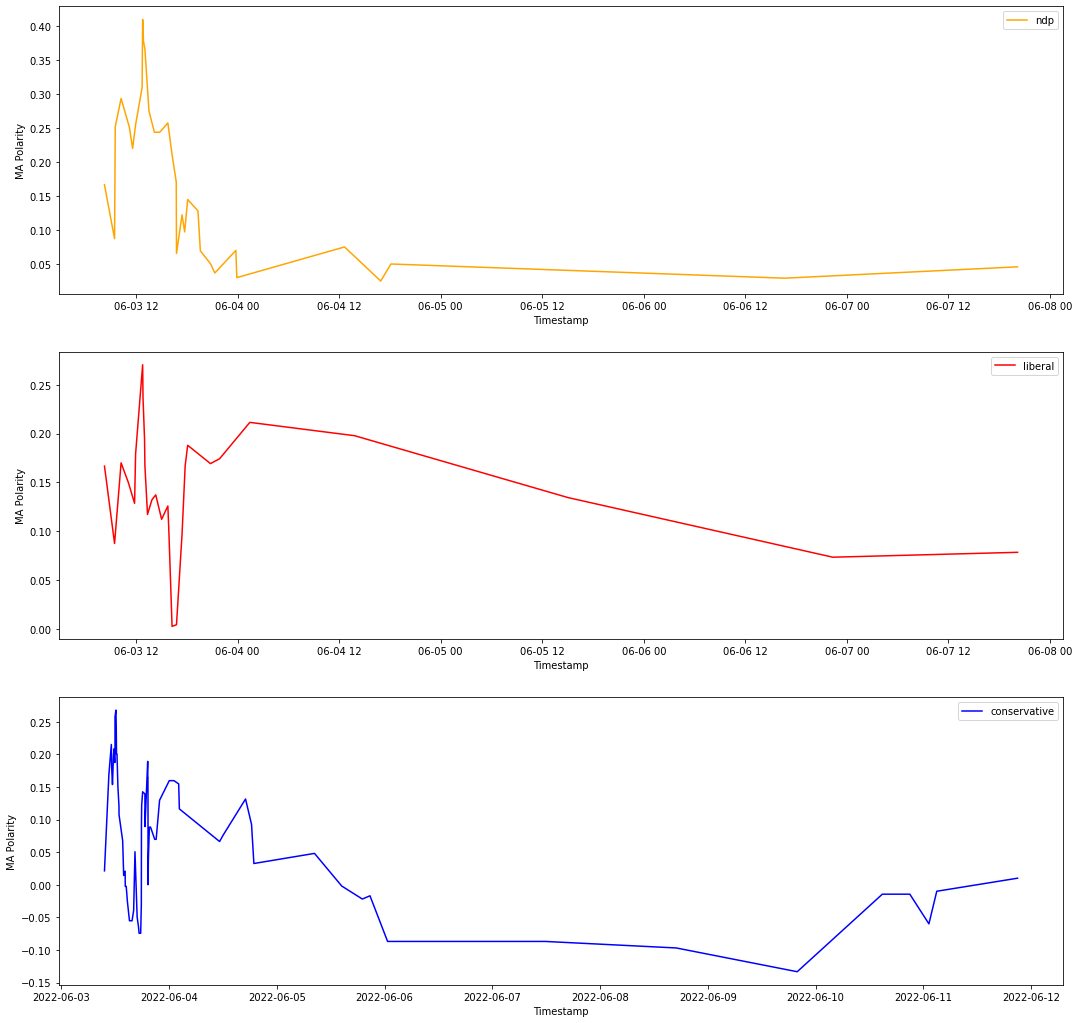

In [175]:
#plot polarity
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

sns.lineplot(data=ndp, x='Timestamp', y='MA Polarity', label='ndp',ax=axes[0],color='orange')
sns.lineplot(data=liberal, x='Timestamp', y='MA Polarity', label='liberal',ax=axes[1],color='red')
sns.lineplot(data=conservative, x='Timestamp', y='MA Polarity', label='conservative',ax=axes[2],color='blue')

In [176]:
tweet_df.head()

,Tweet,Timestamp,ndp_column,liberal_column,conservative_column,ProcessedTweet,score,polarity,subjectivity
0,Doug Ford put highways before kids. He likes t...,2022-06-11 21:00:01+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0,0.0,0.0
1,Doug Ford put highways before kids. He likes t...,2022-06-11 03:00:00+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0,0.0,0.0
2,Doug Ford put highways before kids. He likes t...,2022-06-11 01:15:00+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0,0.0,0.0
3,Doug Ford put highways before kids. He likes t...,2022-06-10 21:00:01+00:00,0,0,1,Doug Ford put highways before kids. He likes t...,0,0.0,0.0
4,Doug Ford said that he won't be happy until ON...,2022-06-10 14:52:24+00:00,0,0,1,Doug Ford said that he won't be happy until ON...,0,0.8,1.0


In [177]:
#create rolling average for score
ndp_score = tweet_df[tweet_df['ndp_column']==1][['Timestamp', 'score']]
ndp_score = ndp_score.sort_values(by='Timestamp', ascending=True)
ndp_score['MA score'] = ndp_score.score.rolling(10, min_periods=3).mean()

liberal_score = tweet_df[tweet_df['liberal_column']==1][['Timestamp', 'score']]
liberal_score = liberal_score.sort_values(by='Timestamp', ascending=True)
liberal_score['MA score'] = liberal_score.score.rolling(10, min_periods=3).mean()

conservative_score = tweet_df[tweet_df['conservative_column']==1][['Timestamp', 'score']]
conservative_score = conservative_score.sort_values(by='Timestamp', ascending=True)
conservative_score['MA score'] = conservative_score.score.rolling(10, min_periods=3).mean()

<AxesSubplot:xlabel='Timestamp', ylabel='MA score'>

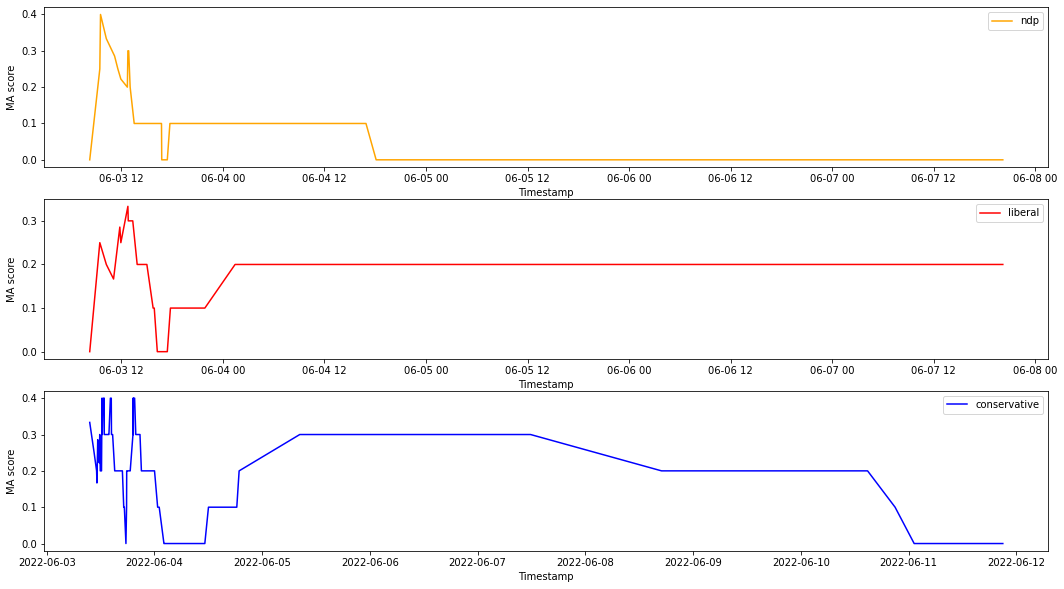

In [178]:

fig, axes = plt.subplots(3, 1, figsize=(18, 10))

sns.lineplot(data=ndp_score, x='Timestamp', y='MA score', label='ndp',ax=axes[0],color='orange')
sns.lineplot(data=liberal_score, x='Timestamp', y='MA score', label='liberal',ax=axes[1],color='red')
sns.lineplot(data=conservative_score, x='Timestamp', y='MA score', label='conservative',ax=axes[2],color='blue')